# Project 2

## Introduction

The dataset chosen contains 1125 weather images of 4 different weather categories of similar size: cloudy, rain, shine, sunrise. Here is the specific breakdown of each category of weather pattern:
300 cloudy images, 215 rain images, 253 shine, and 357 sunrise images – total of 1125 weather images.

Since the dataset is comprised of images, a matrix will have to be manually created for an output matrix as labels for each of the various weather classification patterns. Each of the 4 weather patterns has a specific number of images contained in 1125 images, given in a specific order. A for-loop will be implemented to create an output matrix with the exact values for each weather picture. An input matrix will also be created, containing all 1125 weather images to result in both an input and output matrix to utilize for the train/test/split function. This function will randomize the order of the images in the various sets.

In terms of preprocessing, data augmentation will be implemented to the train set after splitting the images into train, test, and validation sets in order to artificially add more datapoints to increase the accuracy of the neural networks.

For tuning hyperparameters for a convolutional neural network, various architectures will be tested, included different convolution layers, pooling layers, activations, and possibly a fully connected layer with the softmax activation function.

Hyperparameters such as optimizers, activation functions, etc. will not be tested as extensively because they do not apply to the extent for convolutional neural networks as they did for fully connected neural networks.


### Mounting and Importing Libraries

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib
import tensorflow_datasets.public_api as tfds

# keras layers
from tensorflow.keras import layers
from tensorflow.keras.layers import add
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomTranslation
from tensorflow.keras.layers import RandomZoom

from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.callbacks import ModelCheckpoint

# keras models
from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

from tensorflow.keras import backend

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

import glob
from PIL import Image

### Data Preparation

The Weather Data images were downloaded onto the PC, and then was uploading to Google Drive. The glob library was used to read the WeatherData folder from Google Drive into Google Colab and then sorted it alphabetically. This would allow the labels to be manually created since the number of images in each category. The images were originally different sizes, so they had to all be rescaled to 300 x 300 pixels while preserving their RGB channels. Both the input and output lists were converted to arrays. The arrays then were split into test, train, and validation sets. Finally, ImageDataGenerator was used to create artifical images of the training dataset to improve the accuracy of the neural networks. 

In [4]:
# importing WeatherData image folders from Google Drive
img = glob.glob("drive/My Drive/WeatherData/*.jpg")

# sorting the images alphabetically to make easier to manually label iamges
images = sorted(img)

In [5]:
# resizing all images to 300 x 300 while keeping RGB channels
for i in range(len(images)):
  img = Image.open(images[i])
  img = img.convert("RGB")
  newImg = img.resize((300,300))
  images[i] = np.array(newImg)

In [6]:
# converting to array
X = np.array(images)

In [7]:
# manually creating labels based on exact number of images
label_names = ["cloudy", "rain", "shine", "sunrise"]
y = []

for i in range(300):
  y.append(0)
for i in range(215):
  y.append(1)
for i in range(253):
  y.append(2)
for i in range(357):
  y.append(3)


In [8]:
# converting to array
y = np.array(y)

In [9]:
# splitting dataset into test, train, and validation
train_val_X, testX, train_val_Y, testY = train_test_split(X, y, train_size=0.75, random_state=1)
trainX, valX, trainY, valY = train_test_split(train_val_X, train_val_Y, train_size=0.5, random_state=1)

In [10]:
# converting to one-hot
trainY = to_categorical(trainY)
valY = to_categorical(valY)
testY = to_categorical(testY)

In [11]:
# data augmentation
aug = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True, fill_mode="nearest",
                         vertical_flip=True, rotation_range = 30)

## Benchmark Run

For the benchmark run, the model was a simple convolutional neural network with a singular 2x2 convolutional layer with a ReLu activation function. This was then followed by a fully connected layer with a Softmax classifier. This model resulted in 52% accuracy.

### ShallowNet V1

In [11]:
class ShallowNet:
    # create the architecture
    def build(height, width, depth, numFilters, classes):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with numFilters number of 3x3 filters
        model.add(Conv2D(numFilters, (3, 3), padding='same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        
        # add a softmax classifier
        model.add(Flatten())
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 300, 300, 5)       140       
                                                                 
 activation_8 (Activation)   (None, 300, 300, 5)       0         
                                                                 
 flatten_1 (Flatten)         (None, 450000)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1800004   
                                                                 
 activation_9 (Activation)   (None, 4)                 0         
                                                                 
Total params: 1,800,144
Trainable params: 1,800,144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [============================

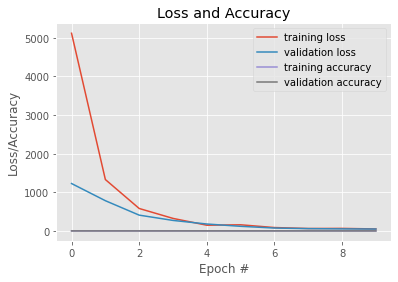

In [ ]:
# compile the model by choosing how the optimizer works
model = ShallowNet.build(300,300,3,5,4)
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 10
H = model.fit(aug.flow(trainX, trainY, batch_size = 32), validation_data = (valX, valY), epochs = maxEpoch)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY, target_names = label_names))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

## Benchmark V2

Since the previous model resulted in about a 52% accuracy, this next model is deeper than the previous one, utilizing two convolutional layers with maxPooling at the end of reach module. This model resulted in a 63% accuracy, an improvement over the simple ShallowNet.

### ShallowNetV2

In [14]:
class ShallowNetV2:

    # create the architecture
    def build(height, width, depth, classes):
        # create a feedforward neural net
        model = Sequential()
  
        # adding a second convolutional layer as well as including maxPooling
        model.add(Conv2D(5, (3, 3), padding = 'same', input_shape = (300, 300, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

        model.add(Conv2D(5, (3, 3), padding = 'same', input_shape = (300, 300, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        
        # add a softmax classifier
        model.add(Flatten())
        model.add(Dense(4))
        model.add(Activation('softmax'))

        return model

Epoch 1/10
14/14 [==============================] - 7s 503ms/step - loss: 12.1603 - accuracy: 0.4964 - val_loss: 7.6267 - val_accuracy: 0.5498
Epoch 2/10
14/14 [==============================] - 7s 518ms/step - loss: 3.4340 - accuracy: 0.5534 - val_loss: 3.3956 - val_accuracy: 0.4976
Epoch 3/10
14/14 [==============================] - 7s 483ms/step - loss: 1.9599 - accuracy: 0.5226 - val_loss: 1.9707 - val_accuracy: 0.5877
Epoch 4/10
14/14 [==============================] - 7s 485ms/step - loss: 1.6417 - accuracy: 0.5701 - val_loss: 1.7833 - val_accuracy: 0.6066
Epoch 5/10
14/14 [==============================] - 7s 481ms/step - loss: 1.3992 - accuracy: 0.5416 - val_loss: 1.9254 - val_accuracy: 0.5948
Epoch 6/10
14/14 [==============================] - 7s 487ms/step - loss: 1.4185 - accuracy: 0.5796 - val_loss: 1.7141 - val_accuracy: 0.6137
Epoch 7/10
14/14 [==============================] - 7s 491ms/step - loss: 1.3823 - accuracy: 0.6057 - val_loss: 2.0679 - val_accuracy: 0.6066
Epoch

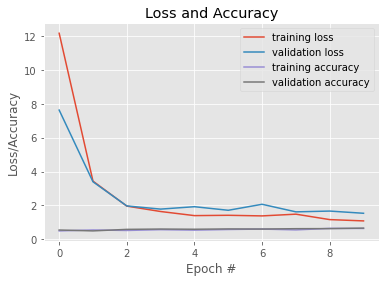

In [17]:
# create model and build ShallowNetV2
model = ShallowNetV2.build(300,300,3,4)

# compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

# fit the model to the training data
maxEpoch = 10
H = model.fit(aug.flow(trainX, trainY, batch_size = 32), validation_data = (valX, valY), epochs = maxEpoch)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY, target_names = label_names))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

## Model Architecture Testing

### MiniVGGNet

In [36]:
class MiniVGGNet:
  def build(height, width, depth, classes):
    model = Sequential(name = 'MiniVGGNet')

    # rescaling layer to change image shape
    model.add(Rescaling(1./255, input_shape = (height, width, depth)))

    # data augmentation
    model.add(RandomFlip())
    model.add(RandomRotation(0.1))
    model.add(RandomZoom(0.1))
    
    # various convolutional layers
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = (height, width, depth)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(32, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
   
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation('softmax'))

    return model

Model: "MiniVGGNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 300, 300, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 300, 300, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 300, 300, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 activation_7 (Activation)   (None, 300, 300, 32)      0         
                                                        

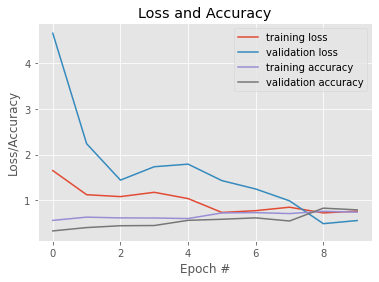

In [37]:
# compile the model by choosing 300how the optimizer works
model = MiniVGGNet.build(300,300,3,4)
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 10
H = model.fit(aug.flow(trainX, trainY, batch_size = 8), validation_data = (valX, valY), epochs = maxEpoch)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY, target_names = label_names))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

### LeNet

In [12]:
class LeNet:
    # create the architecture
    def build(height, width, depth, classes):
        # create a feedforward neural net
        model = Sequential()

        #rescaling layer to change image shape
        model.add(Rescaling(1./255, input_shape = (height, width, depth)))

        #data augmentation
        model.add(RandomFlip("horizontal"))
        model.add(RandomRotation(0.1))
        model.add(RandomZoom(0.1))
        
        # add a convolutional layer with 20 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(32, (5, 5), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        
        # add another convolutional layer with 50 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(64, (5, 5), padding= 'same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        
        # add another convolutional layer
        model.add(Conv2D(128, (5, 5), padding = 'same'))
        model.add(Activation('relu'))
        
        # add a fully-connected layer
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        
        # add a softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the constructed model
        return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 300, 300, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 300, 300, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 32)      2432      
                                                                 
 activation (Activation)     (None, 300, 300, 32)      0         
                                                        

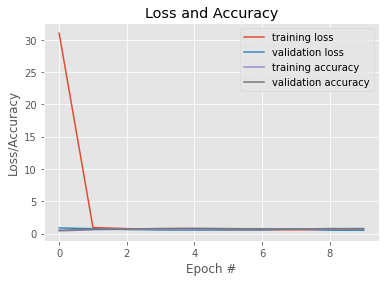

In [13]:
# compile the model by choosing how the optimizer works
model = LeNet.build(300,300,3,4)
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 10
H = model.fit(aug.flow(trainX, trainY, batch_size = 32), validation_data = (valX, valY), epochs = maxEpoch)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY, target_names = label_names))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

In [14]:
# saving model
model.save("model1")

### AlexNet

In [ ]:
class AlexNet:
    def build(height, width, depth, classes, lambda2 = 0.0002):
        model = Sequential(name = 'AlexNet')

        #rescaling layer to change image shape
        model.add(Rescaling(1./255, input_shape = (height, width, depth)))

        #data augmentation
        model.add(RandomFlip())
        model.add(RandomRotation(0.1))
        model.add(RandomZoom(0.1))
        
        # various convolutional layers
        model.add(Conv2D(96, (11, 11), strides = (4, 4), input_shape = (height, width, depth),
                         padding='same', kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(256, (5, 5), padding = 'same', kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(384, (3, 3), padding = 'same', kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(Conv2D(384, (3, 3), padding = 'same', kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(Conv2D(256, (3, 3), padding = 'same', kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        
        model.add(Dense(4096, kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        model.add(Dense(4096, kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        model.add(Dense(classes, kernel_regularizer = l2(lambda2)))
        model.add(Activation('softmax'))
        
        return model

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 300, 300, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 300, 300, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 75, 75, 96)        34944     
                                                                 
 activation (Activation)     (None, 75, 75, 96)        0         
                                                           

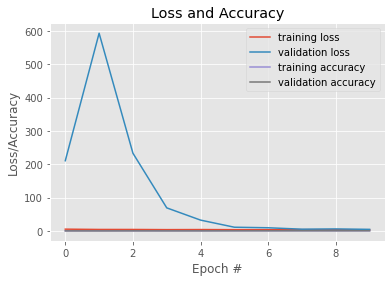

In [ ]:
# compile the model by choosing how the optimizer works
model = AlexNet.build(300,300,3,4)
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 10
H = model.fit(aug.flow(trainX, trainY, batch_size = 32), validation_data = (valX, valY), epochs = maxEpoch)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY, target_names = label_names))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

### MobileNetV3Small

In [15]:
# loading model from Keras model zoo
base_model = keras.applications.MobileNetV3Small(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(300, 300, 3),
    include_top=False)

4334752/4334752 [==============================] - 0s 0us/step


In [16]:
base_model.trainable = False

In [17]:
inputs = keras.Input(shape=(300, 300, 3))

x = base_model(inputs, training=False)

# softmax classifier
x = Flatten()(x)
x = Dense(4)(x)
x = Activation('softmax')(x)
        
# create the model
model = Model(inputs, x)

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 10
H = model.fit(aug.flow(trainX, trainY, batch_size = 32), validation_data = (valX, valY), epochs = maxEpoch)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY, target_names = label_names))


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 10, 10, 576)      939120    
 l)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 4)                 230404    
                                                                 
 activation_5 (Activation)   (None, 4)                 0         
                                                                 
Total params: 1,169,524
Trainable params: 230,404
Non-trainable params: 939,120
_______________________________________________

In [19]:
# saving model
model.save("model2")

### EfficientNetB1

In [20]:
# loading model from Keras zoo
base_model = keras.applications.EfficientNetB1(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(300, 300, 3),
    include_top=False)

27018416/27018416 [==============================] - 2s 0us/step


In [21]:
base_model.trainable = False

In [22]:
inputs = keras.Input(shape=(300, 300, 3))

x = base_model(inputs, training=False)
# softmax classifier
x = Flatten()(x)
x = Dense(4)(x)
x = Activation('softmax')(x)
        
# create the model
model = Model(inputs, x)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 efficientnetb1 (Functional)  (None, 10, 10, 1280)     6575239   
                                                                 
 flatten_2 (Flatten)         (None, 128000)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 512004    
                                                                 
 activation_6 (Activation)   (None, 4)                 0         
                                                                 
Total params: 7,087,243
Trainable params: 512,004
Non-trainable params: 6,575,239
_________________________________________________________________
Epoch 1/10
14/14 [=========================

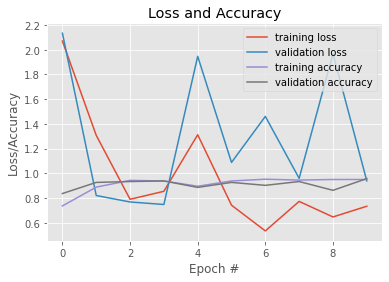

In [23]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 10
H = model.fit(aug.flow(trainX, trainY, batch_size = 32), validation_data = (valX, valY), epochs = maxEpoch)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY, target_names = label_names))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

In [24]:
# saving model
model.save("model3")

### **Best Run**

### Ensemble with 3 Best Results: LeNet, MobileNetV3Small, and EfficientNetB1

After all the previous preliminary runs, the models that had the highest accuracy were:

*LeNet*: 79%

*MobileNetV3Small*: 90%

*EfficientNetB1*: 95%

Next, the models were ensembled to produce the highest possible accuracy between these three networks.

After ensembling, the final accuracy for classifying these particular weather images was 96% accuracy.

In [34]:
# loading models
models = []
model1 = keras.models.load_model("model1")
model2 = keras.models.load_model("model2")
model3 = keras.models.load_model("model3")
models.append(model1)
models.append(model2)
models.append(model3)

# initialize the list of predictions
print('Evaluating ensemble...')
predictions = []

# loop over the models
for model in models:
    # use the current model to make predictions on the testing data, then store these predictions in the aggregate predictions list
    predictions.append(model.predict(testX, batch_size=32))

Evaluating ensemble...
9/9 [==============================] - 4s 141ms/step


In [39]:
# average the probabilities across all model predictions
predictions = np.average(predictions, axis=0)


# show a classification report
print(classification_report(testY, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        81
           1       0.98      1.00      0.99        48
           2       0.95      0.92      0.93        62
           3       0.98      1.00      0.99        91

    accuracy                           0.96       282
   macro avg       0.96      0.96      0.96       282
weighted avg       0.96      0.96      0.96       282



## Conclusion

The dataset chosen contained 1125 images of various weather patterns as followed:

1. Cloudy - 300 images
2. Rain - 215 images
3. Shine - 253 images
4. Sunrise - 357 images

The input and output arrays were manually created by reshaping images and creating the output arrays based on the fixed number of each image type.

Various convolutional neural architectures were tested. The baseline run consisted of a simple network with a singular convolutional layer and a classifier at the end. This model ended with about 52% accuracy.


Next, a second, slightly more advanced benchmark, utilized two convolution layers that implemented a maxPooling layer at the end of convolutional module. This architecture increased the accuracy of the network from 52% accuracy to 63% accuracy.


The other tested neural architecture included:


*   MiniVGGNet: 76%
*   LeNet: 79%
*   AlexNet: 66%
*   MobileNetV3Small (Transfer Learning): 90%
*   EfficientNetB1 (Transfer Learning): 95%

*Deeper networks such as ResNet and MiniGoogLeNet were attemped, but Colab was unable to allocate the memory for such large networks.


For the final run, the three networks with the highest accuracies (LeNet, MobileSmallV3, and EfficientNetB1) were ensembled together. Ensembling essentially averages the predictions of the input models, so they can "vote" on predictions. This technique almost guarantees a higher accuracy than those of the individual accuracies of the input models.


This resulted in a 96% accuracy for the final run.






